### DS/2025/TC5/043

This project analyzes pizza sales data to understand customer purchasing behavior, sales performance, and product trends. The goal is to extract meaningful insights that can support business decision-making.

In [1]:
import pandas as pd #importing pandas for data manipulation
import matplotlib as plt #importing matplotlib for visualization
import seaborn as sns #importing seaborn for visualization

## Data Loading
The datasets were imported individually before being prepared for merging and analysis.

In [2]:
orders = pd.read_csv(r"C:\Users\HP_ELITE BOOK\Desktop\techcrush bish!\data sets\pizza_sales\orders.csv") #importing the first dataset i.e orders

orders

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30
...,...,...,...
21345,21346,2015-12-31,20:51:07
21346,21347,2015-12-31,21:14:37
21347,21348,2015-12-31,21:23:10
21348,21349,2015-12-31,22:09:54


In [3]:
orders.head() #a brief display of what the dataset looks like

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [4]:
orderdtls = pd.read_csv(r"C:\Users\HP_ELITE BOOK\Desktop\techcrush bish!\data sets\pizza_sales\order_details.csv") #importing the second dataset i.e order details

orderdtls

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1


In [5]:
orderdtls.head() #a brief display of what the data looks like

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [6]:
pizza = pd.read_csv(r"C:\Users\HP_ELITE BOOK\Desktop\techcrush bish!\data sets\pizza_sales\pizzas.csv") #importing the third dataset i.e pizzas

pizza

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75
...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00
92,spinach_fet_l,spinach_fet,L,20.25
93,veggie_veg_s,veggie_veg,S,12.00
94,veggie_veg_m,veggie_veg,M,16.00


In [7]:
pizza.head()  #a brief display of the dataset

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [8]:
pizza_types = pd.read_csv(r"C:\Users\HP_ELITE BOOK\Desktop\techcrush bish!\data sets\pizza_sales\pizza_types.csv",encoding="latin1") #importing the fourth dataset i.e pizza types

pizza_types

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
5,thai_ckn,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
6,big_meat,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau..."
7,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
8,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
9,ital_cpcllo,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,..."


In [9]:
pizza_types.head() #a brief display of the dataset

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


## Data Inspection
The structure and data types of each dataset were examined to ensure compatibility
before merging

In [10]:
for name, dataset in {"orders": orders,"orderdtls": orderdtls,"pizza": pizza, "pizza_types": pizza_types}.items():
    print(f"\n{name.upper()} COLUMNS:")
    print(list(dataset.columns))


ORDERS COLUMNS:
['order_id', 'date', 'time']

ORDERDTLS COLUMNS:
['order_details_id', 'order_id', 'pizza_id', 'quantity']

PIZZA COLUMNS:
['pizza_id', 'pizza_type_id', 'size', 'price']

PIZZA_TYPES COLUMNS:
['pizza_type_id', 'name', 'category', 'ingredients']


## Data Merging
All datasets were merged into a single dataframe using common keys such as
order_id, pizza_id, and pizza_type_id to enable complete analysis.

In [11]:
df = pd.merge(orders, orderdtls, on="order_id", how="inner") #creating a dataframe to merge the datasets. "on" indicates which column will be used to merge the datasets

In [12]:
df = pd.merge(df, pizza, on = "pizza_id", how="inner") #adding pizza dataset to the dataframe using the pizza id column

In [13]:
df = pd.merge(df, pizza_types, on="pizza_type_id", how = "inner") #adding the pizza type dataset to the dataframe using the pizza type id column

In [14]:
df

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21348,2015-12-31,21:23:10,48616,ckn_alfredo_m,1,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
48616,21348,2015-12-31,21:23:10,48617,four_cheese_l,1,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
48617,21348,2015-12-31,21:23:10,48618,napolitana_s,1,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."
48618,21349,2015-12-31,22:09:54,48619,mexicana_l,1,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [15]:
df["datetime"] = pd.to_datetime(df["date"] + " " + df["time"]) #creating a new column that gives the date and time of orders in full

df

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,datetime
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01 11:38:36
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01 11:57:40
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01 11:57:40
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01 11:57:40
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01 11:57:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21348,2015-12-31,21:23:10,48616,ckn_alfredo_m,1,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",2015-12-31 21:23:10
48616,21348,2015-12-31,21:23:10,48617,four_cheese_l,1,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",2015-12-31 21:23:10
48617,21348,2015-12-31,21:23:10,48618,napolitana_s,1,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",2015-12-31 21:23:10
48618,21349,2015-12-31,22:09:54,48619,mexicana_l,1,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-12-31 22:09:54


In [16]:
df.isna().sum() #checking the number of missing values in the dataframe

order_id            0
date                0
time                0
order_details_id    0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
datetime            0
dtype: int64

In [17]:
df.describe() #a summary of statistical insights from the dataframe

,order_id,order_details_id,quantity,price,datetime
count,48620.000000,48620.000000,48620.000000,48620.000000,48620
mean,10701.479761,24310.500000,1.019622,16.494132,2015-06-30 03:28:34.933833984
min,1.000000,1.000000,1.000000,9.750000,2015-01-01 11:38:36
25%,5337.000000,12155.750000,1.000000,12.750000,2015-03-31 15:34:31
50%,10682.500000,24310.500000,1.000000,16.500000,2015-06-28 19:50:30
75%,16100.000000,36465.250000,1.000000,20.250000,2015-09-28 18:39:55
max,21350.000000,48620.000000,4.000000,35.950000,2015-12-31 23:02:05
std,6180.119770,14035.529381,0.143077,3.621789,NaN


In [18]:
df.groupby("name")[["price","quantity"]].mean().sort_values("price")

,price,quantity
name,,
The Big Meat Pizza,12.000000,1.056875
The Pepperoni Pizza,12.468658,1.020684
The Hawaiian Pizza,13.317194,1.021941
"The Pepperoni, Mushroom, and Peppers Pizza",13.865127,1.012668
The Green Garden Pizza,14.001520,1.010132
The Classic Deluxe Pizza,15.575952,1.015315
The Sicilian Pizza,15.963831,1.027027
The Vegetables + Vegetables Pizza,15.979967,1.010596
The Spinach and Feta Pizza,16.076292,1.009777


In [19]:
df["revenue"] = df["quantity"] + df["price"] #creating a new column for revenue by adding values in the quanity column and price column together

df

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,datetime,revenue
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01 11:38:36,14.25
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01 11:57:40,17.00
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01 11:57:40,19.50
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01 11:57:40,21.75
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01 11:57:40,17.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21348,2015-12-31,21:23:10,48616,ckn_alfredo_m,1,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",2015-12-31 21:23:10,17.75
48616,21348,2015-12-31,21:23:10,48617,four_cheese_l,1,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",2015-12-31 21:23:10,18.95
48617,21348,2015-12-31,21:23:10,48618,napolitana_s,1,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",2015-12-31 21:23:10,13.00
48618,21349,2015-12-31,22:09:54,48619,mexicana_l,1,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-12-31 22:09:54,21.25


In [20]:
category_sales = df.groupby("category")["revenue"].sum() #categories of pizzas according to the revenues
category_sales.sort_values(ascending=False)

category
Classic    230620.60
Supreme    216473.75
Chicken    202577.25
Veggie     201847.10
Name: revenue, dtype: float64

In [21]:
size_sales = df.groupby("size")["revenue"].sum() #sizes of pizzas sold in descending order
size_sales.sort_values(ascending=False)

size
L      385818.1
M      261044.5
S      189197.5
XL      14424.0
XXL      1034.6
Name: revenue, dtype: float64

### Insight
Large-sized pizzas generate the highest revenue, suggesting customers prefer
larger portions or group orders. Promotions focusing on large sizes may further
increase profitability.

In [22]:
total_revenue = df["revenue"].sum() #calculating the total revenue
print(f'Total Revenue/sales is {total_revenue} Naira')

Total Revenue/sales is 851518.7 Naira


### Insight
The business generated a total revenue of ₦851,519 during the analyzed period,
indicating strong overall sales performance and consistent customer demand.

In [23]:
total_qty = df["quantity"].sum() #calculating the total quantity of pizzas sold

print(f'The total quantity of pizzas sold is {total_qty}')

The total quantity of pizzas sold is 49574


In [24]:
total_orders = df["order_id"].nunique() #getting the total number of individual orders
print(f"The total number of orders are: {total_orders}")

The total number of orders are: 21350


In [25]:
pizzatype = df["name"].nunique() #the total number of of pizza types

print(f' {pizzatype} pizza types are sold')

 32 pizza types are sold


In [26]:
df['price'].mean()

np.float64(16.494132044426163)

In [27]:
avprice = df["price"].mean()
avprice

print("The average price of pizza in the company is: {avprice}")

The average price of pizza in the company is: {avprice}


In [28]:
df["order_time"] = pd.to_datetime(df["time"]) # creating a new column for order time
df["hour"] = df["order_time"].dt.hour #creating a new column for hour of orders

df

C:\Users\HP_ELITE BOOK\AppData\Local\Temp\ipykernel_15120\3118779055.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["order_time"] = pd.to_datetime(df["time"]) # creating a new column for order time


,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,datetime,revenue,order_time,hour
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01 11:38:36,14.25,2026-02-20 11:38:36,11
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01 11:57:40,17.00,2026-02-20 11:57:40,11
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01 11:57:40,19.50,2026-02-20 11:57:40,11
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01 11:57:40,21.75,2026-02-20 11:57:40,11
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01 11:57:40,17.00,2026-02-20 11:57:40,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21348,2015-12-31,21:23:10,48616,ckn_alfredo_m,1,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",2015-12-31 21:23:10,17.75,2026-02-20 21:23:10,21
48616,21348,2015-12-31,21:23:10,48617,four_cheese_l,1,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",2015-12-31 21:23:10,18.95,2026-02-20 21:23:10,21
48617,21348,2015-12-31,21:23:10,48618,napolitana_s,1,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",2015-12-31 21:23:10,13.00,2026-02-20 21:23:10,21
48618,21349,2015-12-31,22:09:54,48619,mexicana_l,1,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-12-31 22:09:54,21.25,2026-02-20 22:09:54,22


In [29]:
peak_hours = df.groupby("hour")["order_id"].nunique() 

print(peak_hours.sort_values(ascending=False))

hour
12    2520
13    2455
18    2399
17    2336
19    2009
16    1920
20    1642
14    1472
15    1468
11    1231
21    1198
22     663
23      28
10       8
9        1
Name: order_id, dtype: int64


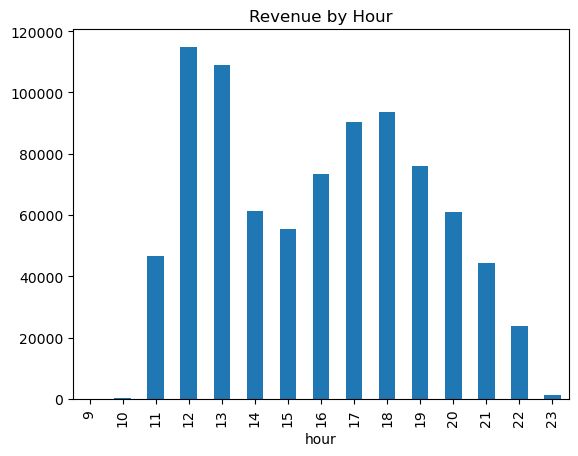

In [30]:
import matplotlib.pyplot as plt  # Make sure to import pyplot

hourly_revenue = df.groupby("hour")["revenue"].sum()
plot = hourly_revenue.plot(kind="bar", title="Revenue by Hour")

plt.savefig('Revenue by Hour.png') #to save plot immediately

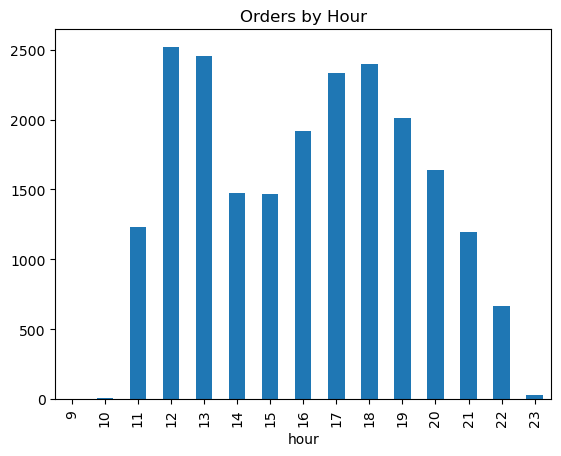

In [31]:
peak_hours.plot(kind="bar", title="Orders by Hour")

plt.savefig('Orders by Hour')

In [32]:
df["order_date"] = pd.to_datetime(df["date"])
df["day_of_week"] = df["order_date"].dt.day_name()

df

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,datetime,revenue,order_time,hour,order_date,day_of_week
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01 11:38:36,14.25,2026-02-20 11:38:36,11,2015-01-01,Thursday
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01 11:57:40,17.00,2026-02-20 11:57:40,11,2015-01-01,Thursday
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01 11:57:40,19.50,2026-02-20 11:57:40,11,2015-01-01,Thursday
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01 11:57:40,21.75,2026-02-20 11:57:40,11,2015-01-01,Thursday
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01 11:57:40,17.00,2026-02-20 11:57:40,11,2015-01-01,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21348,2015-12-31,21:23:10,48616,ckn_alfredo_m,1,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",2015-12-31 21:23:10,17.75,2026-02-20 21:23:10,21,2015-12-31,Thursday
48616,21348,2015-12-31,21:23:10,48617,four_cheese_l,1,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",2015-12-31 21:23:10,18.95,2026-02-20 21:23:10,21,2015-12-31,Thursday
48617,21348,2015-12-31,21:23:10,48618,napolitana_s,1,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",2015-12-31 21:23:10,13.00,2026-02-20 21:23:10,21,2015-12-31,Thursday
48618,21349,2015-12-31,22:09:54,48619,mexicana_l,1,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-12-31 22:09:54,21.25,2026-02-20 22:09:54,22,2015-12-31,Thursday


In [33]:
sales_by_day = df.groupby("day_of_week")["revenue"].sum()

print(sales_by_day.sort_values(ascending=False))

day_of_week
Friday       142015.90
Thursday     128390.45
Saturday     128358.30
Wednesday    118952.45
Tuesday      118659.70
Monday       111842.15
Sunday       103299.75
Name: revenue, dtype: float64


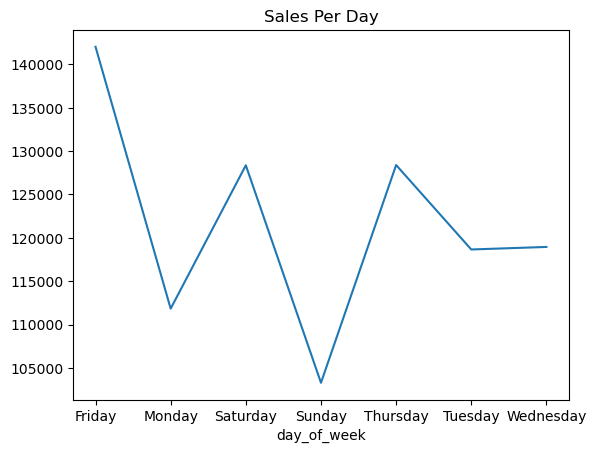

In [34]:
sales_by_day.plot(title="Sales Per Day")

plt.savefig('Sales per Day')

In [35]:
ddd = sales_by_day.idxmax()

In [36]:
print(f"{ddd} had the highest sales per week")

Friday had the highest sales per week


### Insight
Friday recorded the highest sales, possibly due to end-of-week activities such
as social gatherings and movie nights. Sunday showed the lowest sales,
suggesting reduced customer activity. Production planning should prioritize Fridays.

In [37]:
top_pizzas = (df.groupby("name")["quantity"].sum().sort_values(ascending=False).head(5))

print(top_pizzas)

name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64


In [38]:
pizza_counts = df['name'].value_counts()
print(pizza_counts)

name
The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Sicilian Pizza                            1887
The Spicy Italian Pizza                       1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza           

C:\Users\HP_ELITE BOOK\AppData\Local\Temp\ipykernel_15120\3383332123.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='name', order=df['name'].value_counts().index, palette='viridis')


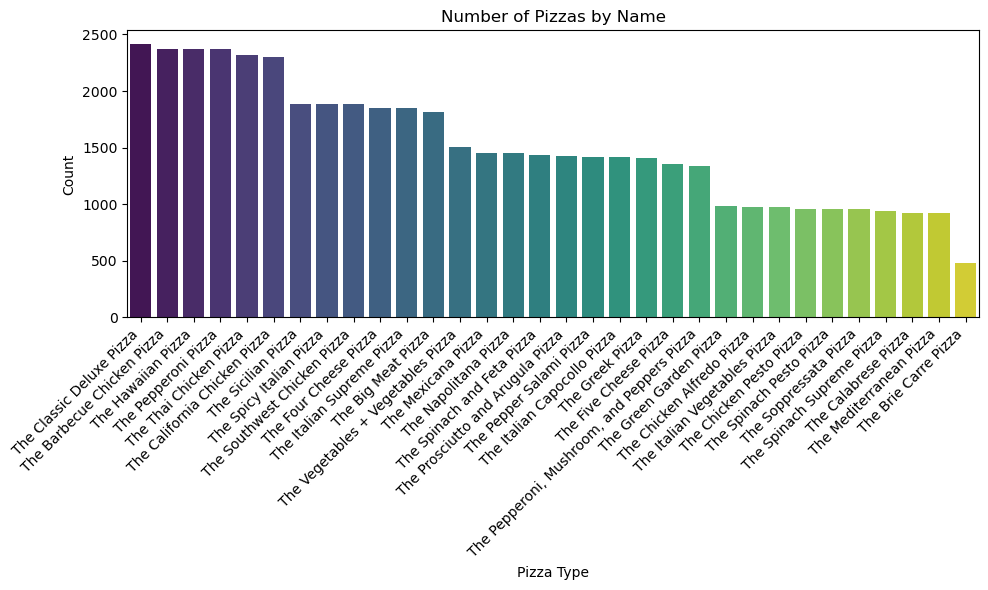

In [39]:
import pandas as pd 
import matplotlib.pyplot as plt  # Changed from 'import matplotlib as plt'
import seaborn as sns

# Create a figure with specified size (10 inches width, 6 inches height)
plt.figure(figsize=(10,6))
# Create a count plot showing frequency of each pizza name
# Order bars by frequency (most common first) and use 'viridis' color palette
sns.countplot(data=df, x='name', order=df['name'].value_counts().index, palette='viridis')
# Add a title to the plot
plt.title('Number of Pizzas by Name')
# Label the x-axis
plt.xlabel('Pizza Type')
# Label the y-axis
plt.ylabel('Count')
# Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45, ha='right')
# Adjust layout to prevent label overlap
plt.tight_layout()
# Display the plot

plt.savefig('Pizza types')

### Insight
The Classic Deluxe, Barbecue Chicken, Hawaiian, Pepperoni, and Thai Chicken pizzas are the most popular items on the menu, indicating strong customer preference for these flavors. These pizzas should remain core menu offerings.

In [40]:
df["month"] = df["order_date"].dt.month_name()

df

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,datetime,revenue,order_time,hour,order_date,day_of_week,month
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01 11:38:36,14.25,2026-02-20 11:38:36,11,2015-01-01,Thursday,January
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01 11:57:40,17.00,2026-02-20 11:57:40,11,2015-01-01,Thursday,January
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01 11:57:40,19.50,2026-02-20 11:57:40,11,2015-01-01,Thursday,January
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01 11:57:40,21.75,2026-02-20 11:57:40,11,2015-01-01,Thursday,January
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01 11:57:40,17.00,2026-02-20 11:57:40,11,2015-01-01,Thursday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21348,2015-12-31,21:23:10,48616,ckn_alfredo_m,1,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",2015-12-31 21:23:10,17.75,2026-02-20 21:23:10,21,2015-12-31,Thursday,December
48616,21348,2015-12-31,21:23:10,48617,four_cheese_l,1,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",2015-12-31 21:23:10,18.95,2026-02-20 21:23:10,21,2015-12-31,Thursday,December
48617,21348,2015-12-31,21:23:10,48618,napolitana_s,1,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",2015-12-31 21:23:10,13.00,2026-02-20 21:23:10,21,2015-12-31,Thursday,December
48618,21349,2015-12-31,22:09:54,48619,mexicana_l,1,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-12-31 22:09:54,21.25,2026-02-20 22:09:54,22,2015-12-31,Thursday,December


In [41]:
monthly_sales = df.groupby("month")["revenue"].sum()

print(monthly_sales.sort_values(ascending=False))

month
July         75419.45
May          74267.35
March        73459.00
November     73320.00
January      72704.70
April        71437.20
August       71236.80
June         70903.30
February     68028.40
December     67385.00
September    66908.00
October      66449.50
Name: revenue, dtype: float64


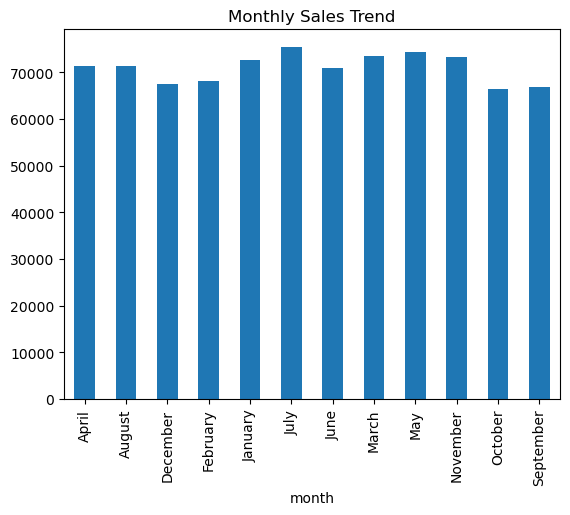

In [42]:
monthly_sales.plot(kind="bar", title="Monthly Sales Trend")

plt.savefig('Monthly sales trend')

### Insight
Monthly sales variations suggest possible seasonal demand patterns, indicating that customer purchasing behavior may change throughout the year.


In [43]:
worst_pizzas = (df.groupby("name")["quantity"].sum().sort_values().head(5))

print(worst_pizzas)

name
The Brie Carre Pizza         490
The Mediterranean Pizza      934
The Calabrese Pizza          937
The Spinach Supreme Pizza    950
The Soppressata Pizza        961
Name: quantity, dtype: int64


### Insight
Some pizza types recorded low sales performance, suggesting they may require
additional marketing promotion or potential removal from the menu to improve
overall efficiency.

In [44]:
monthly_sales = df.groupby("month")["revenue"].sum()

monthly_growth = monthly_sales.pct_change()*100
monthly_growth

month
April             NaN
August      -0.280526
December    -5.407037
February     0.954812
January      6.874041
July         3.733940
June        -5.988044
March        3.604487
May          1.100410
November    -1.275594
October     -9.370567
September    0.689998
Name: revenue, dtype: float64

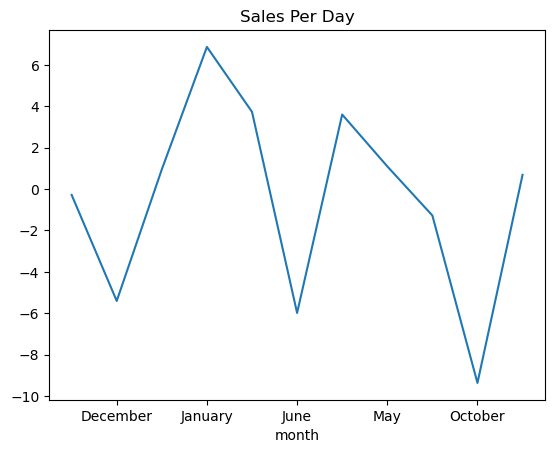

In [45]:
monthly_growth.plot(title="Sales Per Day")

plt.savefig('Sales per day')

In [46]:
df[["quantity","price","revenue"]].corr()

,quantity,price,revenue
quantity,1.000000,0.007142,0.046597
price,0.007142,1.000000,0.999221
revenue,0.046597,0.999221,1.000000


In [47]:
numeric_df = df.select_dtypes(include="number")
numeric_df.head()

,order_id,order_details_id,quantity,price,revenue,hour
0,1,1,1,13.25,14.25,11
1,2,2,1,16.00,17.00,11
2,2,3,1,18.50,19.50,11
3,2,4,1,20.75,21.75,11
4,2,5,1,16.00,17.00,11


In [48]:
corr_matrix = numeric_df.corr()
corr_matrix

,order_id,order_details_id,quantity,price,revenue,hour
order_id,1.000000,0.999990,0.003621,-0.003323,-0.003177,0.006419
order_details_id,0.999990,1.000000,0.003639,-0.003286,-0.003139,0.006392
quantity,0.003621,0.003639,1.000000,0.007142,0.046597,-0.058092
price,-0.003323,-0.003286,0.007142,1.000000,0.999221,-0.000677
revenue,-0.003177,-0.003139,0.046597,0.999221,1.000000,-0.002969
hour,0.006419,0.006392,-0.058092,-0.000677,-0.002969,1.000000


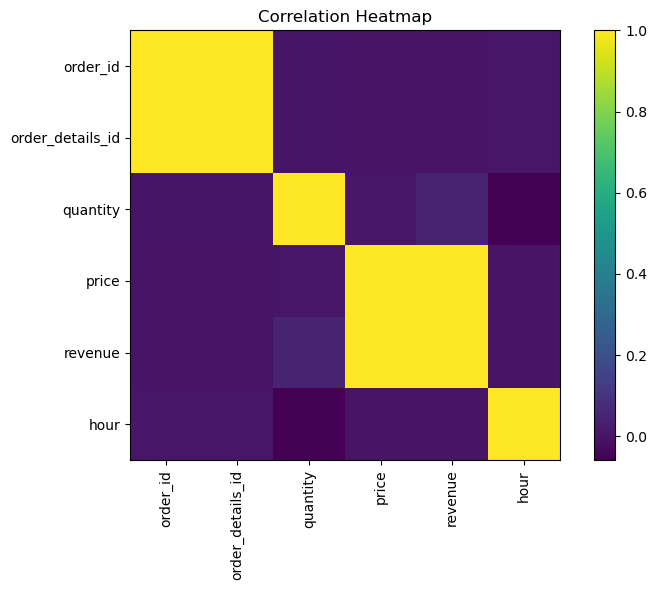

<Figure size 640x480 with 0 Axes>

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Assuming corr_matrix is a pandas DataFrame

plt.figure(figsize=(8,6))

plt.imshow(corr_matrix, interpolation="nearest")
plt.colorbar()

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

plt.savefig('Correlation Heatmap')


### Insight
Revenue shows a strong positive correlation with quantity sold, indicating that increased sales volume directly drives revenue growth. Price shows a weaker relationship with quantity, suggesting customer demand is not strongly price-sensitive.

## Overall Business Insights

- Evening and midday periods drive the highest sales.
- Large pizzas contribute the most revenue.
- Fridays are the most profitable business days.
- Certain pizzas dominate customer preference.
- Some menu items underperform and may require review.

These findings can help management optimize pricing, promotions,
and production planning.